<a href="https://colab.research.google.com/github/younhuiji/openCV/blob/main/%5B3%5DOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### OCR: Optical Character Recognition = 광학 문자 인식  OCR은 이미지나 스캔된 문서 등에서 문자를 자동으로 인식하여 텍스트 데이터로 변환하는 기술을 의미한다.


### OCR의 주요 활용 사례와 기능

1. 문서 디지털화: 스캔된 문서나 손으로 쓴 메모, 인쇄된 책 등의 물리적인 텍스트를 디지털 텍스트로 변환하여 컴퓨터에서 편집, 저장, 검색 등의 작업을 수행

2. 자동 데이터 입력: 양식, 설문지, 송장 등의 정보를 자동으로 디지털 데이터로 변환하여 수작업을 줄이고 효율성을 향상

3. 번역: OCR을 통해 인식된 텍스트를 다른 언어로 번역하는 데 사용

4. 비접촉 인터페이스: 실시간 카메라 피드에서 텍스트를 인식하여, 예를 들면 길 안내나 번역을 제공하는 모바일 애플리케이션에 활용

5. 접근성 향상: 시각 장애인이나 난독증을 가진 사람들이 이미지나 인쇄된 텍스트를 읽는 데 도움을 받을 수 있다.


In [ ]:
!pip install PyPDF2
!pip install pdf2image
!apt-get install -y poppler-utils  # pdf2image가 내부적으로 사용하는 유틸리티

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.2 [186 kB]
Fetched 186 kB in 1s (280 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.2_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.2) ...
Setting up poppler-utils (22.02.0-2ubuntu0.2) ...
Processing triggers for man-db (2.10.2-1) ...


# 텍스트 추출  PyPDF2.PdfReader(file)로 파일을 읽고 extractText()로 글자를 추출한다.

In [ ]:
from PyPDF2 import PdfReader

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf = PdfReader(file)
        text_content = ""
        for page in pdf.pages:
            text_content += page.extract_text()
    return text_content


pdf_path = "/content/drive/MyDrive/저녁ICT/day19/OpenCV_17.pdf"
text_content = extract_text_from_pdf(pdf_path)
with open("/content/drive/MyDrive/저녁ICT/day20/extracted_text.txt", "w") as text_file:
    text_file.write(text_content)


In [ ]:
# 저장된 파일의 경로
saved_file_path = "/content/drive/MyDrive/저녁ICT/day20/extracted_text.txt"

# 파일을 읽고 내용 출력
with open(saved_file_path, 'r') as file:
    content = file.read()
    print(content)


Open_ cv17
DL_applications &모형테스트
ICT , DS&DE Y -A , KIM DL:applications
전이학습(Transfer Learning)?
이미학습된모델을다른새로운태스크에적용하는방법또는사고방식 전반을가리키며 ,
그중파인튜닝(Fine Tuning)이라고불리는사전학습된모델의일부를변경하고
재학습하는방법DL:applications
정리하면 ?
•사전학습한가중치를이용할수있는심층학습의모델
•예측,특징량추출및FineTuning_ 미세조정 에사용
•모델을인스턴스와 하면 ~가중치는 ~/.keras /models/ 에저장
목적?
해결하려는 문제에서 빠른속도로일정수준의베이스라인성능을얻고싶을때
가장쉽고빠른방법 ->Transfer LearningDL:applications
•언제사용될까 ?
사전학습_Pre-trained된네트워크의 가중치를사용하고싶을때
•방법은 ?
a.모델변형사지 않고사용
b.모델분류기재학습(가장많이사용)
c.모델일부를동결해제하여재학습
입력
출력입력 입력 입력
출력 출력 출력모델 모델 모델전부
재학습
일부층만
재학습
분류기
(Classifier)새분류기
(N_Classifier )새분류기
(N_Classifier )새분류기
(N_Classifier )DL:applications
•케라스의 다양한모델
사전학습모델시공통세가지인자를사용
•weights : ImageNet 데이터를 학습시킨 가중치의 사용여부결정
•input_shape :입력데이터의 형태를전달
•include_top : 모델의분류기층을포함해서 구성할지 전달
Fasle로지정되면 데이터셋에 적합한분류기를직접정의
from tensorflow.keras.applications import *
mobilenet = MobileNet (weights = None, input_shape = None, 
include_top = True)
resnet50 = ResNet50(weights = None, input_shape = None, 
include_top = True)
xceptio

2. OpenCV_17.pdf 파일에 포함된 각 페이지를 이미지로 변환하고, 지정한 디렉터리에 01_01.jpg, 01_02.jpg 등의 형식으로 저장해보자


In [ ]:
import os
from pdf2image import convert_from_path

# PDF 경로
pdf_path = "/content/drive/MyDrive/저녁ICT/day19/OpenCV_17.pdf"

# 이미지로 변환
images = convert_from_path(pdf_path)

# 지정한 디렉터리가 없으면 생성
save_dir = "/content/drive/MyDrive/저녁ICT/day20/pdf_res/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 이미지 저장
for idx, img in enumerate(images, 1):
    file_name = os.path.join(save_dir, f"01_{idx:02}.jpg")
    img.save(file_name, "JPEG")


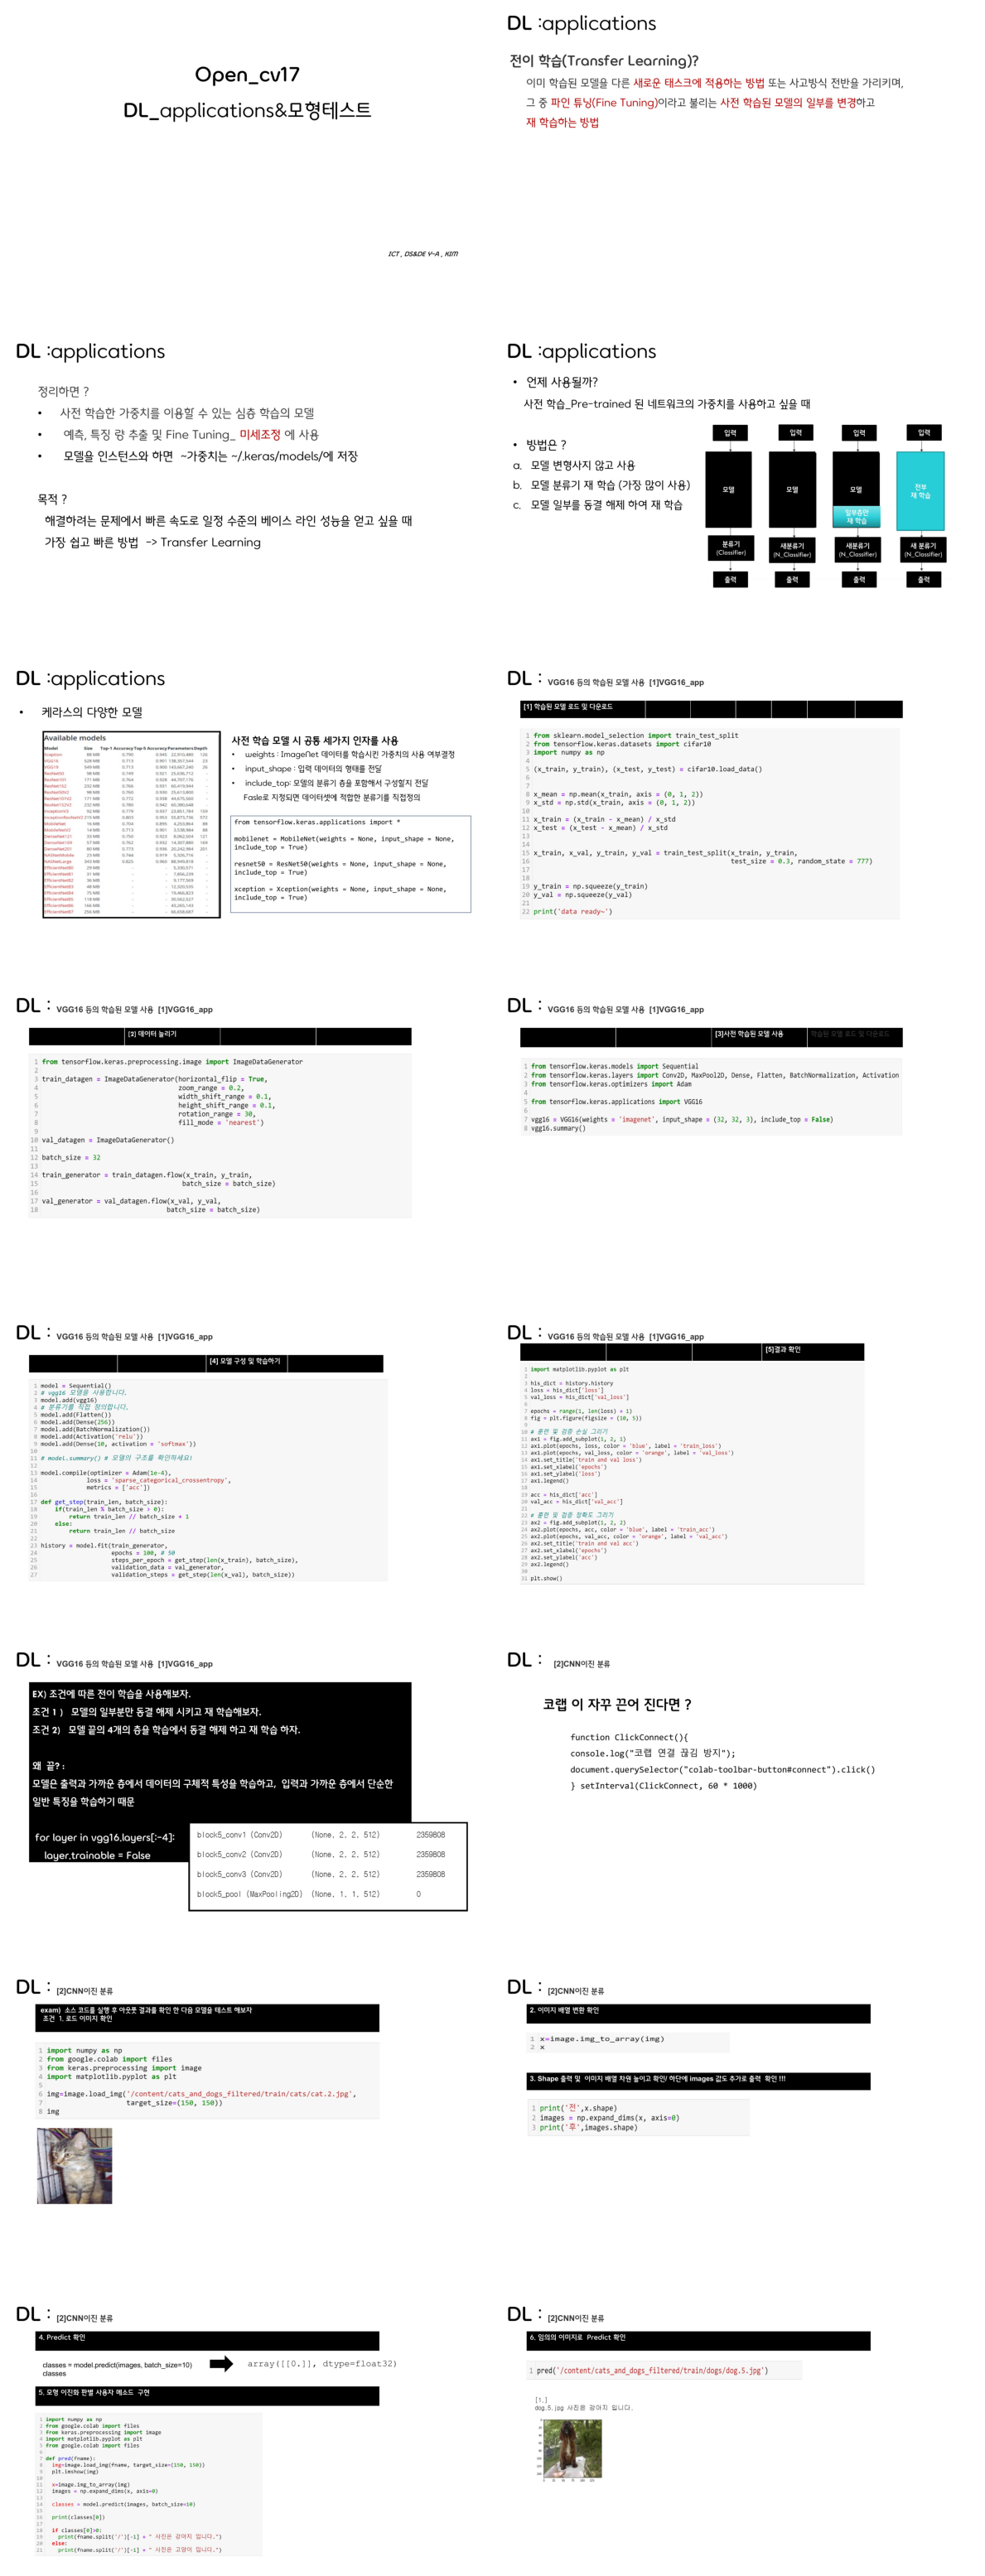

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

# 이미지들이 저장된 디렉터리
save_dir = "/content/drive/MyDrive/저녁ICT/day20/pdf_res/"

# 디렉터리 내의 모든 jpg 파일 가져오기
image_files = [os.path.join(save_dir, file) for file in os.listdir(save_dir) if file.endswith('.jpg')]
image_files.sort()  # 파일 이름 순으로 정렬

# 이미지 로드
images = [cv2.imread(file, cv2.IMREAD_COLOR) for file in image_files]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]  # OpenCV는 BGR 순서로 이미지를 로드하므로 RGB로 변환

# 이미지를 그리드에 표시
rows = len(images) // 2 + len(images) % 2  # 2열로 표시하기 위해 필요한 행의 수 계산
fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
for ax, img in zip(axes.ravel(), images):
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()
